In [1]:
import torch
import sys
import torch
import os.path as osp
import tqdm
import sys
import numpy as np
sys.path.append('/afs/cern.ch/work/m/mgarciam/private/mlpf/')
from src.dataset.dataset import SimpleIterDataset
from src.utils.utils import to_filelist
from torch.utils.data import DataLoader
import dgl


/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
class Args:
    def __init__(self):
        self.data_train = ['/afs/cern.ch/work/m/mgarciam/public/pf_tree_1.root']
        self.data_val = ['/afs/cern.ch/work/m/mgarciam/public/pf_tree_1.root']
        #self.data_train = files_train
        self.data_config = '/afs/cern.ch/work/m/mgarciam/private/mlpf/config_files/config_2_newlinks.yaml'
        self.extra_selection = None
        self.train_val_split = 0.8
        self.data_fraction = 1
        self.file_fraction = 1
        self.fetch_by_files = False
        self.fetch_step = 0.01
        self.steps_per_epoch = None
        self.in_memory = False
        self.local_rank = None
        self.copy_inputs = False
        self.no_remake_weights = False
        self.batch_size = 10
        self.num_workers = 0
        self.demo = False
        self.laplace = False
        self.diffs = False
        self.class_edges = False
args = Args()
train_range = (0, args.train_val_split)
train_file_dict, train_files = to_filelist(args, 'train')

In [7]:
train_data = SimpleIterDataset(train_file_dict, args.data_config, for_training=True,
                                   extra_selection=args.extra_selection,
                                   remake_weights= True,
                                   load_range_and_fraction=(train_range, args.data_fraction),
                                   file_fraction=args.file_fraction,
                                   fetch_by_files=args.fetch_by_files,
                                   fetch_step=args.fetch_step,
                                   infinity_mode= False,
                                   in_memory=args.in_memory,
                                   async_load = False,
                                   name='train')

In [8]:
iterator = iter(train_data)

=== Restarting DataIter train, seed=None ===


In [26]:
a, b= next(iterator)

0
157


torch.Size([5, 7])

In [5]:
g,gt = next(iterator)
hit_type = g.ndata['hit_type']
e = g.ndata['e_hits']
pos = g.ndata['pos_hits_norm']
hit_type_a = torch.argmax(hit_type,dim=1)
particle_id = g.ndata['particle_number']
pos_particles = gt[:,0:3]
e_particle = gt[:,3]
print([torch.sum(e[particle_id == i]) for i in np.unique(particle_id)])
print(e_particle)

[2]
[]
9
[tensor(0.1522)]
tensor([0.7295])


In [23]:
torch.tensor(np.full((4), False, dtype=bool))

tensor([False, False, False, False])

In [23]:
torch.tensor([False, False,  True,  True])+torch.tensor([True, True,  False,  False])

tensor([True, True, True, True])

In [23]:
mask = torch.tensor([1, 1, 1, 1], dtype=torch.uint8).to(bool)
~mask

tensor([False, False, False, False])

In [21]:
particle_id[~mask]

/tmp/mgarciam/ipykernel_14016/1108350608.py:1: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541990/work/aten/src/ATen/native/IndexingUtils.h:27.)
  particle_id[~mask]


tensor([1., 1., 2., 2.])

In [27]:
list_p = np.unique(g.ndata['particle_number_nomap'])
for p in list_p: 
    mask = g.ndata['particle_number_nomap']==p
    print(p, np.unique(hit_type_a[mask]))

2.0 [0 1 2 3]


In [49]:
hit_particle_link = g.ndata['particle_number']
list_p = np.unique(hit_particle_link)
list_remove = []
for p in list_p: 
    mask = hit_particle_link==p
    hit_types = np.unique(hit_type_a[mask])
    if np.array_equal(hit_types, [0,1]):
        list_remove.append(p)

for p in list_remove:
    mask = hit_particle_link == p
    mask = mask + mask


In [ ]:
gt[list_remove]

In [56]:
mask_particles = list_p==list_remove
gt1 =gt[~mask_particles]

In [58]:
gt1.shape

torch.Size([3, 7])

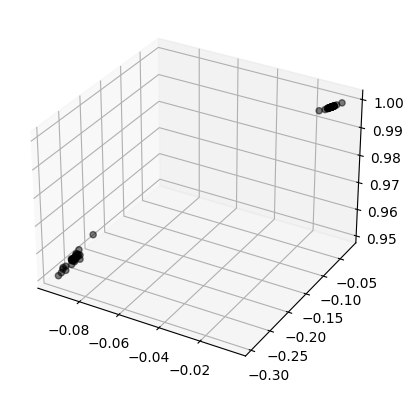

In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
i = 1
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.scatter(pos[:,0], pos[:,1], pos[:,2],marker='o', c = particle_id, alpha=0.005)
ax.scatter(pos[:,0][particle_id==i], pos[:,1][particle_id==i], pos[:,2][particle_id==i],marker='o', c ="k" , alpha=0.5)

# plotting ideas:
* that the plots are interactive (plotly)
* the dots are the size of the energy (tracks no energy)
* plot particles 
* plot direction of the track (functions line 105 there are the different outputs )

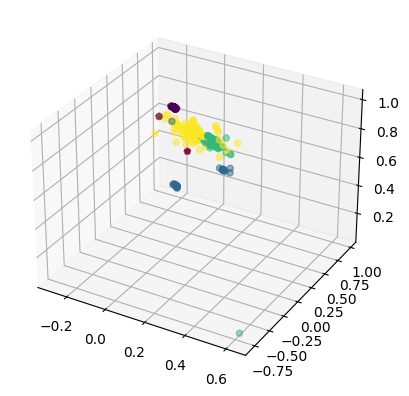

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos[:,0], pos[:,1], pos[:,2],marker='o', c = particle_id, alpha=0.5)
ax.scatter(pos[:,0][particle_id==1], pos[:,1][particle_id==1], pos[:,2][particle_id==1],marker='*', c = "r", alpha=1)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 2 with shape (1336,).

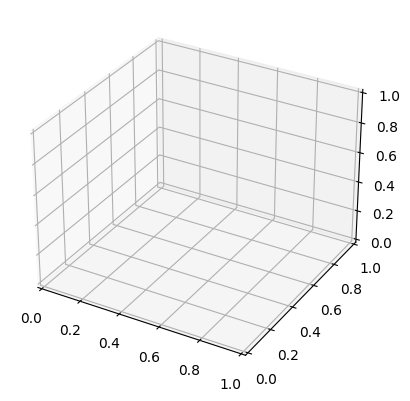

In [46]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
i=6
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos[:,0][particle_id==i], pos[:,1][particle_id==i], pos[:,2],marker='o', c = "k", alpha=0.05)
ax.scatter(pos[:,0][particle_id==3], pos[:,1][particle_id==3], pos[:,2][particle_id==3],marker='*', c = "r", alpha=1)



array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15.], dtype=float32)

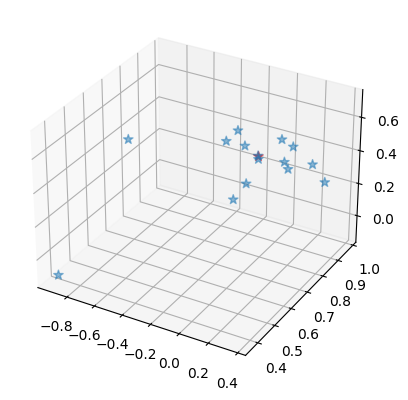

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos_particles[:,0], pos_particles[:,1], pos_particles[:,2],marker='*',s= 50, alpha=0.5)
ax.scatter(pos_particles[2,0], pos_particles[2,1], pos_particles[2,2],marker='*', c="red",s= 50, alpha=0.5)

In [9]:
from src.dataset.functions_graph import graph_batch_func
train_loader = DataLoader(train_data, batch_size=args.batch_size, drop_last=True, pin_memory=True,
                          num_workers=min(args.num_workers, int(len(train_files) * args.file_fraction)),
                          collate_fn = graph_batch_func,
                          persistent_workers=args.num_workers > 0 and args.steps_per_epoch is not None)
iterator = iter(train_loader)

=== Restarting DataIter train, seed=None ===


In [10]:
g,y = next(iterator)

In [15]:
from src.models.wrapper.example_gravnet_model import GraphTransformerNetWrapper
newmodel = GraphTransformerNetWrapper('cpu')


In [16]:
pred = newmodel(g)

In [17]:
batch = g
_, S = pred.shape
xj = torch.nn.functional.normalize(pred[:, 0:3], dim=1)
bj = torch.sigmoid(torch.reshape(pred[:, 3], [-1, 1]))
distance_threshold = torch.reshape(pred[:, 4:7], [-1, 3])
energy_correction = torch.nn.functional.relu(torch.reshape(pred[:, 7], [-1, 1]))
dev = batch.device

clustering_index_l = batch.ndata["particle_number"]

len_batch = len(batch.batch_num_nodes())
batch_numbers = torch.repeat_interleave(
    torch.range(0, len_batch - 1).to(dev), batch.batch_num_nodes()
).to(dev)


/tmp/mgarciam/ipykernel_14056/2649145550.py:13: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(0, len_batch - 1).to(dev), batch.batch_num_nodes()


In [18]:
g = batch
y
distance_threshold
energy_correction
beta=bj.view(-1)
cluster_space_coords=xj  # Predicted by model
cluster_index_per_event=clustering_index_l.view(-1).long()
batch=batch_numbers.long()
qmin=0.1
s_B = 1.0
noise_cluster_index= 0 # cluster_index entries with this value are noise/noise
beta_stabilizing="soft_q_scaling"
huberize_norm_for_V_attractive=False
beta_term_option="paper"
return_components=False

In [19]:
from typing import Tuple, Union
import numpy as np
import torch
from torch_scatter import scatter_max, scatter_add, scatter_mean

from src.layers.object_cond import assert_no_nans, batch_cluster_indices, scatter_count, scatter_counts_to_indices

device = beta.device

assert_no_nans(beta)
# ________________________________
# Calculate a bunch of needed counts and indices locally

# cluster_index: unique index over events
# E.g. cluster_index_per_event=[ 0, 0, 1, 2, 0, 0, 1], batch=[0, 0, 0, 0, 1, 1, 1]
#      -> cluster_index=[ 0, 0, 1, 2, 3, 3, 4 ]
cluster_index, n_clusters_per_event = batch_cluster_indices(
    cluster_index_per_event, batch
)
n_clusters = n_clusters_per_event.sum()
n_hits, cluster_space_dim = cluster_space_coords.size()
batch_size = batch.max() + 1
n_hits_per_event = scatter_count(batch)

# Index of cluster -> event (n_clusters,)
batch_cluster = scatter_counts_to_indices(n_clusters_per_event)

# Per-hit boolean, indicating whether hit is sig or noise
is_noise = cluster_index_per_event == noise_cluster_index
is_sig = ~is_noise
n_hits_sig = is_sig.sum()
n_sig_hits_per_event = scatter_count(batch[is_sig])

# Per-cluster boolean, indicating whether cluster is an object or noise
is_object = scatter_max(is_sig.long(), cluster_index)[0].bool()
print(is_object)
is_noise_cluster = ~is_object

# FIXME: This assumes noise_cluster_index == 0!!
# Not sure how to do this in a performant way in case noise_cluster_index != 0
if noise_cluster_index != 0:
    raise NotImplementedError
object_index_per_event = cluster_index_per_event[is_sig] - 1
object_index, n_objects_per_event = batch_cluster_indices(
    object_index_per_event, batch[is_sig]
)
n_hits_per_object = scatter_count(object_index)
# print("n_hits_per_object", n_hits_per_object)
batch_object = batch_cluster[is_object]
n_objects = is_object.sum()

assert object_index.size() == (n_hits_sig,)
assert is_object.size() == (n_clusters,)
assert torch.all(n_hits_per_object > 0)
assert object_index.max() + 1 == n_objects

# ________________________________
# L_V term

# Calculate q
if beta_stabilizing == "paper":
    q = beta.arctanh() ** 2 + qmin
elif beta_stabilizing == "clip":
    beta = beta.clip(0.0, 1 - 1e-4)
    q = beta.arctanh() ** 2 + qmin
elif beta_stabilizing == "soft_q_scaling":
    q = (beta.clip(0.0, 1 - 1e-4) / 1.002).arctanh() ** 2 + qmin
else:
    raise ValueError(f"beta_stablizing mode {beta_stabilizing} is not known")
assert_no_nans(q)
assert q.device == device
assert q.size() == (n_hits,)

# Calculate q_alpha, the max q per object, and the indices of said maxima
q_alpha, index_alpha = scatter_max(q[is_sig], object_index)
assert q_alpha.size() == (n_objects,)

# Get the cluster space coordinates and betas for these maxima hits too
x_alpha = cluster_space_coords[is_sig][index_alpha]
beta_alpha = beta[is_sig][index_alpha]
assert x_alpha.size() == (n_objects, cluster_space_dim)
assert beta_alpha.size() == (n_objects,)

positions_particles_pred = g.ndata["pos_hits_norm"][is_sig][index_alpha]
positions_particles_pred = (
    positions_particles_pred + distance_threshold[is_sig][index_alpha]
)

e_particles_pred = g.ndata["e_hits"][is_sig][index_alpha]
e_particles_pred = e_particles_pred * energy_correction[is_sig][index_alpha]
x_particles = y[:, 0:3]
e_particles = y[:, 3].unsqueeze(1)
loss_E = torch.mean(
    torch.square(
        (e_particles_pred.to(device) - e_particles.to(device))
        / e_particles.to(device)
    )
)

tensor([False,  True,  True, False,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True, False,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True])


In [20]:
from src.layers.object_cond import calc_energy_pred
e_pred = calc_energy_pred(batch, g, cluster_index_per_event, is_sig, q, beta, energy_correction)

In [22]:
e_pred

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4785e-02, 3.5711e-02, 6.4276e-02,
        6.6300e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3887e-02, 7.5070e-03,
        0.0000e+00, 0.0000e+00, 1.8603e-01, 6.4545e-03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.3632e-03, 2.3831e-02, 1.9276e-02, 2.1584e-04],
       grad_fn=<CatBackward0>)

In [245]:
def calc_energy_pred()
td =0.1
batch_number = torch.max(batch)+1
energies = []
for i in range(0,batch_number):
    mask_batch = batch == i
    X = g.ndata["pos_hits_norm"][mask_batch]
    cluster_index_i = cluster_index_per_event[mask_batch]-1
    is_sig_i = is_sig[mask_batch]

    q_i = q[mask_batch]
    betas = beta[mask_batch]
    q_alpha_i, index_alpha_i = scatter_max(q_i[is_sig_i], cluster_index_i)
    n_points = betas.size(0)
    unassigned = torch.arange(n_points)
    clustering = -1 * torch.ones(n_points, dtype=torch.long)
    counter = 0
    for index_condpoint in index_alpha_i:
        d = torch.norm(X[unassigned] - X[index_condpoint], dim=-1)
        assigned_to_this_condpoint = unassigned[d < td]
        clustering[assigned_to_this_condpoint] = counter
        unassigned = unassigned[~(d < td)]
        counter = counter+1
    counter = 0
    for index_condpoint in index_alpha_i:  
        clustering[index_condpoint] = counter
        counter = counter+1
    if torch.sum(clustering==-1)>0:
        clustering_ = clustering +1
    else:
        clustering_ = clustering
    clus_values = np.unique(clustering)
    e_c = g.ndata["e_hits"][mask_batch][is_sig_i].view(-1)*energy_correction[mask_batch][is_sig_i].view(-1)
    e_objects = scatter_add(e_c,clustering_.long())
    e_objects = e_objects[clus_values != -1]
    energies.append(e_objects)




In [246]:
energies

[tensor([0., 0.], grad_fn=<IndexBackward0>),
 tensor([0., 0., 0., 0., 0.], grad_fn=<IndexBackward0>),
 tensor([0., 0., 0., 0., 0.], grad_fn=<IndexBackward0>),
 tensor([0., 0., 0., 0.], grad_fn=<IndexBackward0>),
 tensor([0., 0., 0., 0.], grad_fn=<IndexBackward0>),
 tensor([0., 0.], grad_fn=<IndexBackward0>),
 tensor([0., 0., 0., 0., 0., 0.], grad_fn=<IndexBackward0>),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        grad_fn=<IndexBackward0>),
 tensor([0., 0., 0., 0., 0., 0.], grad_fn=<IndexBackward0>),
 tensor([0., 0., 0., 0.], grad_fn=<IndexBackward0>)]

In [243]:
torch.cat(energies, dim=0).shape

torch.Size([53])

In [ ]:

def get_clustering(betas: torch.Tensor, X: torch.Tensor, tbeta=.1, td=1.):
    """
    Returns a clustering of hits -> cluster_index, based on the GravNet model
    output (predicted betas and cluster space coordinates) and the clustering
    parameters tbeta and td.
    Takes torch.Tensors as input.
    """
    n_points = betas.size(0)
    select_condpoints = betas > tbeta
    # Get indices passing the threshold
    indices_condpoints = select_condpoints.nonzero()
    # Order them by decreasing beta value
    indices_condpoints = indices_condpoints[(-betas[select_condpoints]).argsort()]
    # Assign points to condensation points
    # Only assign previously unassigned points (no overwriting)
    # Points unassigned at the end are bkg (-1)
    unassigned = torch.arange(n_points)
    clustering = -1 * torch.ones(n_points, dtype=torch.long)
    for index_condpoint in indices_condpoints:
        d = torch.norm(X[unassigned] - X[index_condpoint], dim=-1)
        assigned_to_this_condpoint = unassigned[d < td]
        clustering[assigned_to_this_condpoint] = index_condpoint
        unassigned = unassigned[~(d < td)]
    return clustering

In [107]:

scatter_add(((beta/1.002).arctanh()**2)[is_sig], object_index)

tensor([ 53.6156,   9.2013,   3.4612, 153.9927, 191.7172,  50.7611,  18.2287,
        238.3495,  79.5003,   6.7929,   0.2516,   1.8631,  50.1024,  84.4029,
         29.2634,  29.1281,   9.8238, 165.0628,  10.7713,  25.9932,   0.3579,
          3.1536,  60.3879,   3.5432,  23.5310,   6.6008,  80.1442, 128.9531,
         28.3155,   1.2017,   0.6590,   5.4833,  23.5064,  67.0401,   1.4299,
         34.5466,  13.2144,   7.0710,   1.6161,  44.9324,  22.5851,   5.9772,
          6.6553,   0.5356,  45.3043,   0.5298,   8.2629,   1.7800,   6.8773,
          9.4312,  65.5214,  81.3470,  30.8866], grad_fn=<ScatterAddBackward0>)

In [ ]:
((beta/1.002).arctanh()**2)[is_sig]

In [88]:
e_particles_pred = (scatter_add(g.ndata["e_hits"][is_sig].view(-1), object_index)*energy_correction[is_sig][index_alpha].view(-1)).view(-1,1)

In [93]:
loss_E = torch.log(torch.square(
        (e_particles_pred.to(device) - e_particles.to(device))
        / torch.sqrt(e_particles.to(device)+0.003)
    )+1)
loss_E = torch.mean(loss_E)

In [94]:
loss_E

tensor(1.3214, grad_fn=<MeanBackward0>)

In [68]:
object_index[0:40]

tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [71]:
q_alpha, index_alpha = scatter_max(q[is_sig], object_index)